# Distribuciones de frecuencias condicionales

Las distribuciones de frecuencias condicionales (**CFD** por sus siglas en inglés) son una colección de distribuciones de frecuencia, cada una corresponde a una condición diferente.

En el caso de NLTK, las condiciones en una CFD corresponden a la categoría del texto. Por ejemplo, si quisieramos contar las veces que alguna palabra aparece en determinada categoría de texto tendríamos algo así:

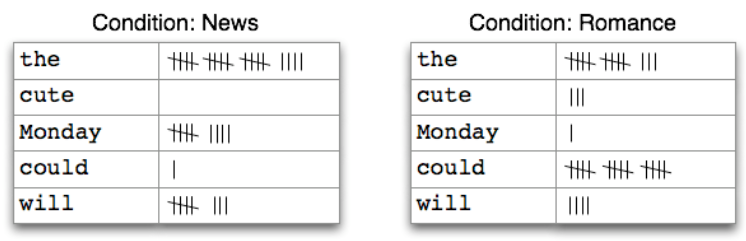

La diferencia entre una distribución de frecuencia y una CFD es que para la primera, contamos el número de veces que un evento se presenta (por ejemplo, una palabra en un texto), mientras que para la segunda tenemos que procesar pares, el primer elemento corresponde a la condición, el segundo al evento.

Por ejemplo, si en lugar de contar cuantas veces aparece una palabra en un texto, quisieramos saber cuantas veces aparece una palabra en determinado género literario, usaríamos una CFD de la siguiente forma:


In [ ]:
import nltk
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist( (genre, word)
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))
len(cfd)

Para simplificar un poco, regresemos al ejemplo con los géneros de "news" y "romance"

In [ ]:
genre_word = [(genre, word) 
             for genre in ['news', 'romance']
             for word in brown.words(categories=genre)]
len(genre_word)

In [ ]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

In [ ]:
cfd.conditions()

Podemos accedeer a cada una de las condiciones y ver que en efecto, cada una es una distribución de frecuencias

In [ ]:
print(cfd['news'])

In [ ]:
cfd['romance'].most_common(20)

Una de las características más intersantes de las CFD es que pueden ayudar a generar gráficas y tablas para hacer un EDA del texto. 

Por ejemplo, el siguiente código va a generar una lista de pares donde el primer elemento será 'america' o 'citizen' y el segundo será el año. Esto lo podemos lograr porque los nombres de los archivos en el corpus "Inaugural" comienzan con el año en que se dió el discurso.


In [ ]:
import nltk
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in ['america', 'citizen'] 
                               if w.lower().startswith(target))
cfd.plot()

En el siguiente ejemplo, usamos las CFD para ver que tan largas son la mayoría de las palabras en ciertos idiomas.

Para ello, usamos el corpus "UHDR" 

In [ ]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik','Spanish']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [ ]:
#Para mayor claridad lo ponemos en una tabla y comparamos inglés y español
cfd.tabulate(conditions=['English', 'Spanish'], samples=range(10), cumulative=True)

#Este resultado muestra que, por ejemplo, en Español, 1563 palabras tienen 9 letras o menos, mientras que en Inglés
#son 1638 palabras con 9 letras o menos